<a href="https://colab.research.google.com/github/Akshay-Naik234/EDA-on-Car-Features/blob/master/Exploratory_Data_Analysis_of_Car_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**What is Exploratory Data Analysis?**

Exploratory Data Analysis or(EDA) is understanding the datasets by summarizing their main characteristcs often plotting them visually.This step is very important especially when we arrive at modeling the data in order to apply Machine learning.Plotting in EDA consists of Histograms,Box plot,Scatter plot and manymore.It often takes much time to explore the data.Through the process of EDA,we understand the problem better and try to uncover hidden insights.


**How to perform Exploratory Analysis?**

The answer is depends on the data set that you are working.There is no one method or common methods to perform EDA.where as in this notebook you can understand some common methods and plots that would be used in EDA process.

**what data are we exploring today?**

The data set can be downloaded from https://www.kaggle.com/CooperUnion/cardataset .To give a piece of brief introduction about the data set this data contains more than 10000 rows and more than 10 columns which contain the feature of the car such as Engine Fuel Type,Engine HP,Transmission Type,highway MPG,city MPG and many more.So in this notebook,we will explore the data and make it ready for the modeling.


# 1. Importing the Required libraries for EDA


In [237]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [238]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['data.csv']))

In [239]:
#To display the top 5 rows
dataset.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [240]:
#To display the bottom 5 rows
dataset.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# 1.2 Checking the types of data and basic summary stats

Here we check for the datatypes because sometimes the MSRP or the price of the car would be stored as a string.If in that case,we have to convert that string to integer data only then we can plot the data via graph .Here in this case,the data is already in integer format so notthing to worry.



In [241]:
# To display datatype of each column and also display the non-null rows for each column.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [242]:
# To display the Summary stats which include count,mean,std,min,max etc
dataset.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [243]:
# To display how many null values are present in each column
dataset.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# 2. Dropping Irrelevant columns

This step is certainly needed in EDA because that columns would never use and in such cases dropping is useful.In this case,the columns such as Engine Fuel Type and the number of doors maynot be very relevant.


In [244]:
dataset = dataset.drop(['Engine Fuel Type','Market Category','Number of Doors'],axis=1 )
dataset.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# 3. Renaming the Columns

In [245]:
# To Rename the Columns
dataset = dataset.rename(columns={'Engine HP':'HP','Engine Cylinders' : 'Cylinders','Transmission Type':'Transmission','Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'price'})
dataset.head(5)


,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# 4 Removing the duplicate rows

This is often a handy thing to because a huge dataset as in this case contains more than 10,000 rows often have duplicate data,sohere we remove all the duplicate values from the data-set

In [246]:
# To display number of duplicated rows present in the dataset
duplicated_rows = dataset[dataset.duplicated()]
print("number of  duplicated rows ",duplicated_rows.shape)

number of  duplicated rows  (792, 13)


In [247]:
# To remove duplicate rows from a dataset
dataset=dataset.drop_duplicates()

In [248]:
# To display the shape
dataset.shape


(11122, 13)

# 4.1 Dropping the missing or null values

This is mostly similar to the previous step but in here the missing values are detected and dropped later.

In [249]:
#To show how many null values present in each column
dataset.isnull().sum()

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
price             0
dtype: int64

In [250]:
# To drop the null values in the dataset
dataset = dataset.dropna()
# To display the total number of values in each column
dataset.count()

Make             11024
Model            11024
Year             11024
HP               11024
Cylinders        11024
Transmission     11024
Drive Mode       11024
Vehicle Size     11024
Vehicle Style    11024
MPG-H            11024
MPG-C            11024
Popularity       11024
price            11024
dtype: int64

In [251]:
#To show how many null values present in each column
dataset.isnull().sum()

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
price            0
dtype: int64

# 5.Detecting Outliers

An outlier is a points that are different from other points.Sometimes they can be very high or low.It's often a good idea to detect and remove outliers.Because outliers are one of the primary reasons for resulting in a less accurate model.Often outliers can be seen with visualizations using a boxplot.Shown below are the box plot of MSRP,Cylinders,HP etc.Herein all the plots,you can find some points are outside the box they are none other than outliers.

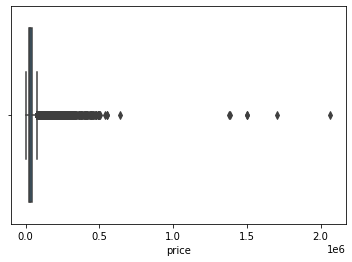

In [252]:
# Boxplot of price column
sns.boxplot(x=dataset['price'])

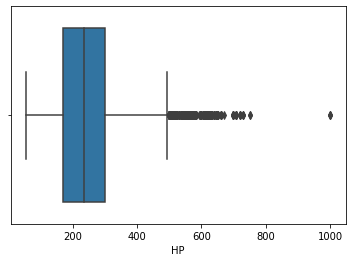

In [253]:
# Boxplot of HP column
sns.boxplot(x=dataset['HP'])

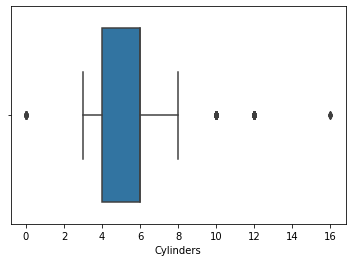

In [254]:
# Boxplot of Cylinders column
sns.boxplot(x=dataset['Cylinders'])

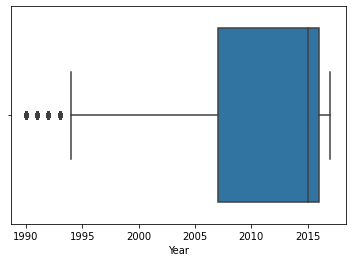

In [255]:
# Boxplot of Year column
sns.boxplot(x=dataset['Year'])

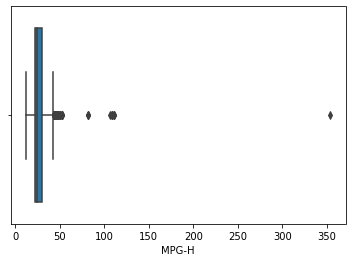

In [256]:
# Boxplot of MPG-H column
sns.boxplot(x=dataset['MPG-H'])

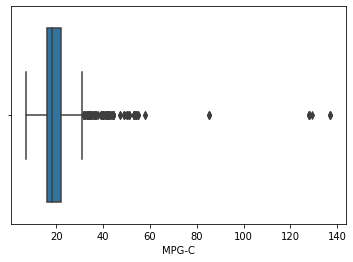

In [257]:
# Boxplot of MPG-C column
sns.boxplot(x=dataset['MPG-C'])

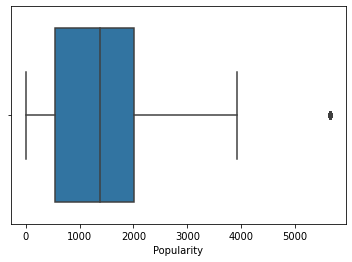

In [258]:
# Boxplot of Popularity column
sns.boxplot(x=dataset['Popularity'])

In [259]:
# To find the interquantile range of each column
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
price         21426.25
dtype: float64


In [260]:
# To remove the outliers using interquantile range
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR ))| (dataset > (Q3 + 1.5 * IQR ))).any(axis=1)]
# After removing the outlier to find shape
dataset.shape

(8546, 13)

# 6.What are the most represented car brands?


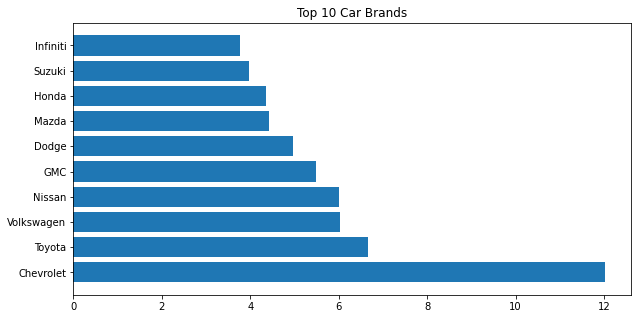

In [261]:
# To display top 10 Car brands
counts = dataset['Make'].value_counts()* 100/sum(dataset['Make'].value_counts())
popular_labels = counts.index[:10]
plt.figure(figsize=(10,5))
plt.barh(popular_labels,width=counts[:10])
plt.title('Top 10 Car Brands')
plt.show()

# 6.1 Average price amoung the top Car brands

In [263]:
# To display average price amoung the top Car brands
prices = dataset[['Make','price']].loc[(dataset['Make'] == 'Chevrolet') | (dataset['Make'] == 'Toyota') | (dataset['Make'] == 'Volkswagen') |(dataset['Make'] == 'Nissan') |(dataset['Make'] == 'Dodge') |(dataset['Make'] == 'GMC') |(dataset['Make'] == 'Honda') | (dataset['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   price
Make                    
Chevrolet   28142.855891
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  29032.817476


# 7. Correlation matrix

In [264]:
# To display how one variable correlate with other variable
dataset.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,price
Year,1.000000,0.325104,-0.106597,0.373319,0.335236,0.200710,0.591439
HP,0.325104,1.000000,0.734094,-0.453451,-0.554768,0.095161,0.745852
Cylinders,-0.106597,0.734094,1.000000,-0.691395,-0.746361,0.013373,0.389049
MPG-H,0.373319,-0.453451,-0.691395,1.000000,0.936978,0.093002,-0.121262
MPG-C,0.335236,-0.554768,-0.746361,0.936978,1.000000,0.081110,-0.197330
Popularity,0.200710,0.095161,0.013373,0.093002,0.081110,1.000000,0.113604
price,0.591439,0.745852,0.389049,-0.121262,-0.197330,0.113604,1.000000


# High Correlation  between

*   Cylinders and HP
*   highway-mpg and City-mpg
    
More the Cylinders  more powerful car


# High anticorrelation  

*   Cylinders and City-mpg
*   Cylinders and highway-mpg

City-mpg having strong negative correlation with Cylinder and also highway-mpg having strong negative correlation  with Cylinder. because lower MPG figures means higher fuel consumption.



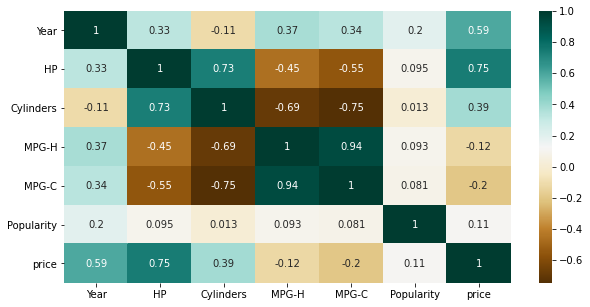

In [265]:
# Displaying the correlation between variable using heatmap
plt.figure(figsize=(10,5))
c = dataset.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# 8.Plotting Different Graphs

Text(0.5, 0, 'Transmission')

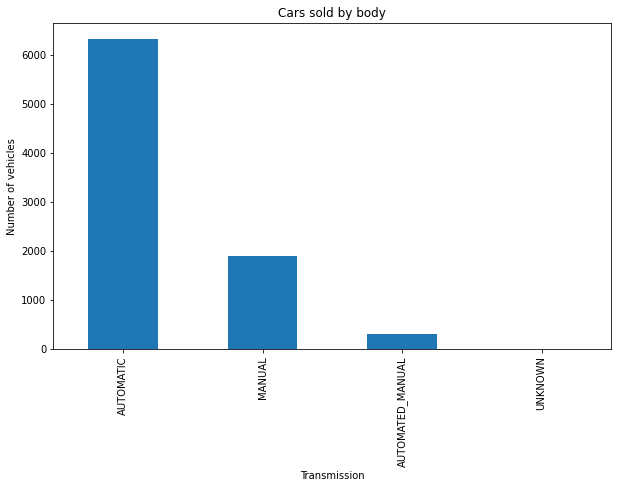

In [266]:
# To display the which Transmission type cars sold most or least
dataset['Transmission'].value_counts().plot.bar(figsize=(10,6))
plt.title("Cars sold by body")
plt.ylabel("Number of vehicles")
plt.xlabel("Transmission")

From the above chart we can see that AUTOMATIC transmission cars sold more

Text(0.5, 0, 'Body size')

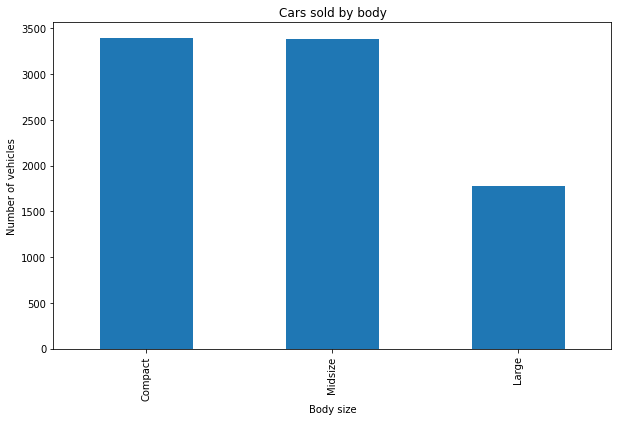

In [267]:
# To display the which size segment cars sold most or least
dataset['Vehicle Size'].value_counts().plot.bar(figsize=(10,6))
plt.title("Cars sold by body")
plt.ylabel("Number of vehicles")
plt.xlabel("Body size")

From the above chart we can see that compact size and mid size Cars are sold more

Text(0.5, 0, 'Body type')

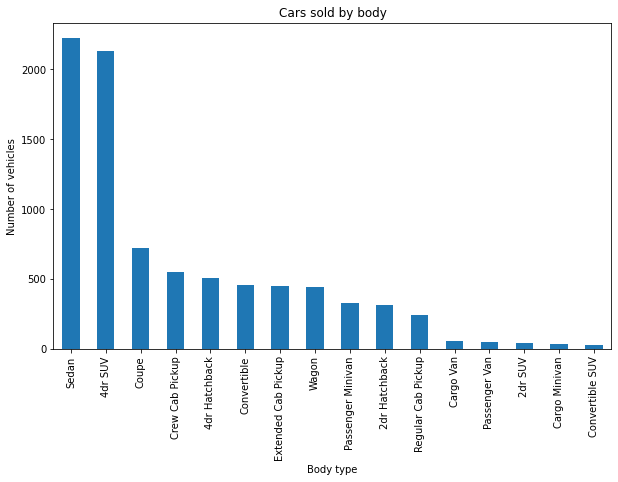

In [268]:
# To display the which style segment cars sold most or least
dataset['Vehicle Style'].value_counts().plot.bar(figsize=(10,6))
plt.title("Cars sold by body")
plt.ylabel("Number of vehicles")
plt.xlabel("Body type")

From the above chart we can see that Sedan Cars were most sold cars followed by 4drSUV

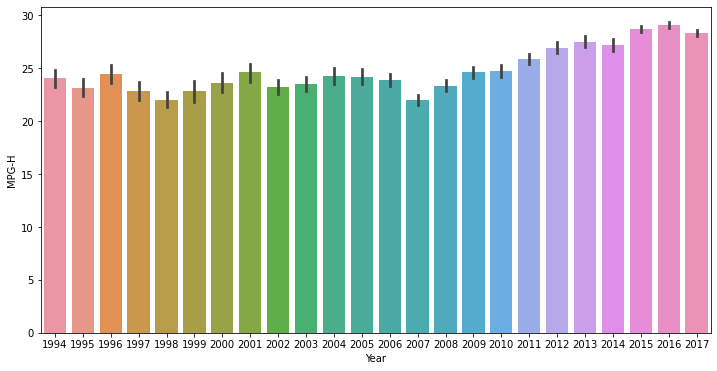

In [269]:
# Plotting Year vs MPG-H using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['Year'],dataset['MPG-H'])

From the above chart we can see that after 2007 the highway milage is increasing linearly.Before 2007 there will be increase as well as decrease in the highway milage.

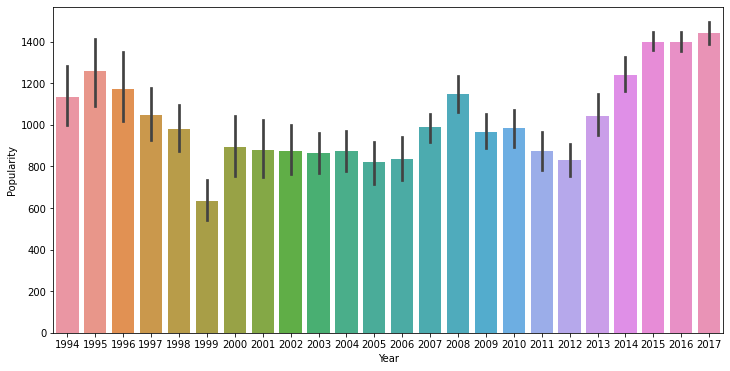

In [270]:
# Plotting Year vs Popularity using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['Year'],dataset['Popularity'])

From the above chart we can see that after 2012 the Popularity is increasing linearly.Before 2012 there will be increase as well as decrease in the highway milage.

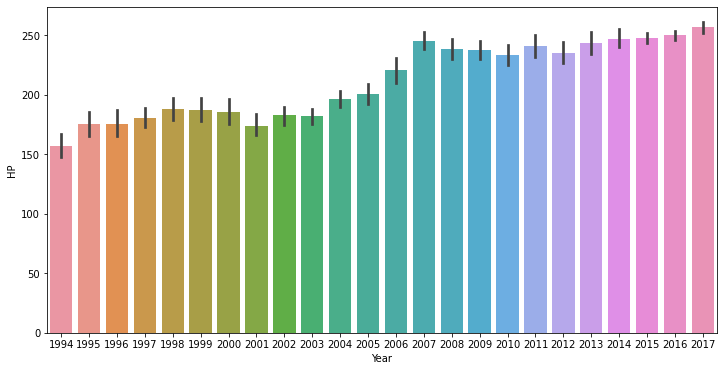

In [271]:
# Plotting Year vs HP using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['Year'],dataset['HP'])

From the above chart we can see that as the year goes on Horse power is also increasing linearly.

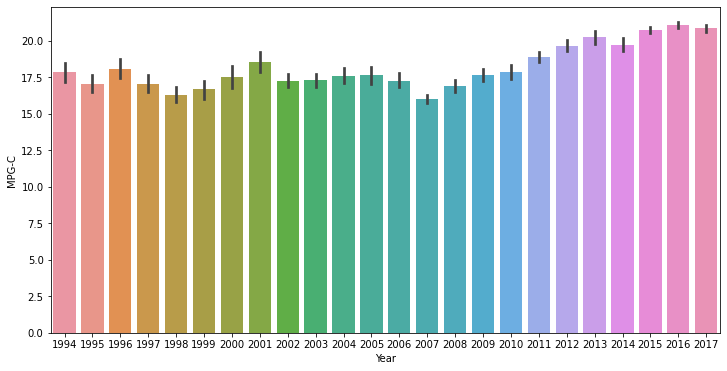

In [272]:
# Plotting Year vs MPG-C using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['Year'],dataset['MPG-C'])

From the above chart we can see that after 2007 the City milage is increasing linearly.Before 2007 there will be increase as well as decrease in the City milage.

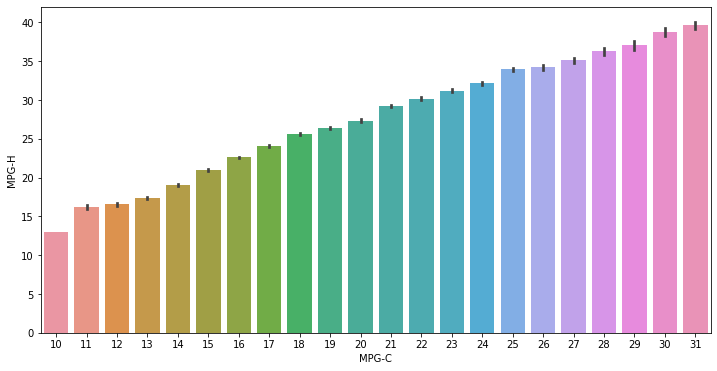

In [273]:
# Plotting MPG-H vs MPG-C using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['MPG-C'],dataset['MPG-H'])

From the above chart we can see that city milage increases linearly with highway milage 

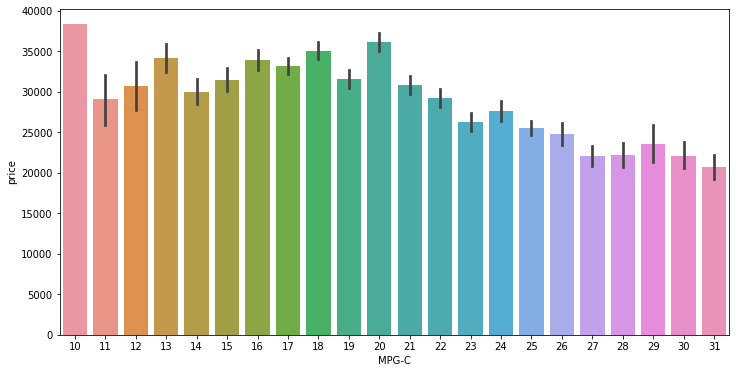

In [274]:
# Plotting price vs MPG-C using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['MPG-C'],dataset['price'])

From the above chart we can see that for 16-20 city milage price increases,above 20 milage price is go on reducing

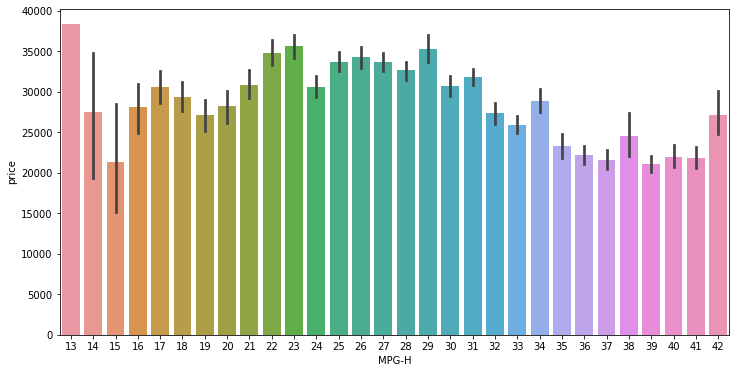

In [275]:
# Plotting price vs MPG-H using barplot
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(dataset['MPG-H'],dataset['price'])

From the above chart we can see that for 25-29 highway milage price increases,above 29 milage price is go on reducing

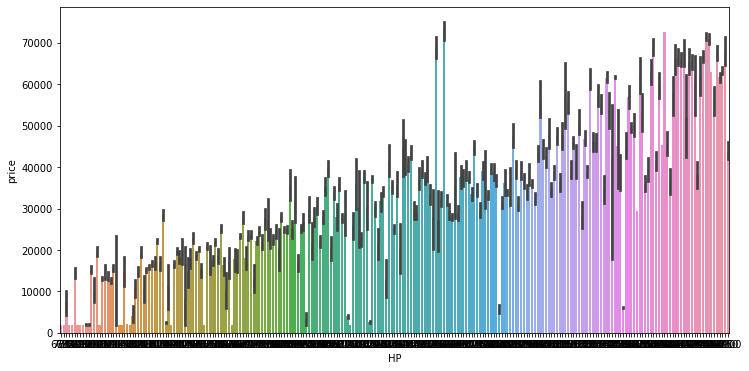

In [276]:
# Plotting price vs HP using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['HP'],dataset['price'])

From the above chart we can see that as the horsepower increases size will also increasing linearly

Text(0.5, 0, 'Count of vehicles')

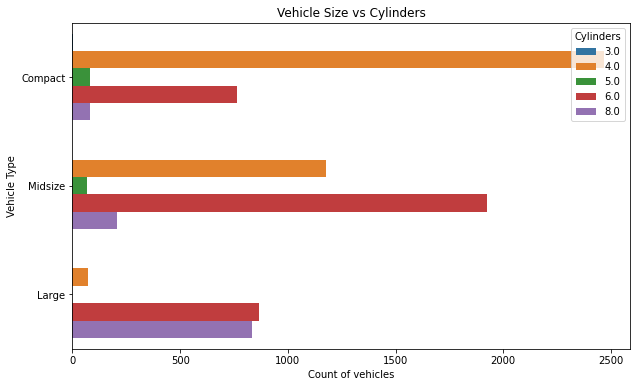

In [277]:
# Vehicle size and Cylinder analysis using countplot
plt.figure(figsize=(10,6))
sns.countplot(y='Vehicle Size',data=dataset,hue='Cylinders')
plt.title('Vehicle Size vs Cylinders')
plt.ylabel("Vehicle Type")
plt.xlabel('Count of vehicles')

From the above chart we can see that majority of 4 cylinders are compact size,majority of 6 cylinders are midsize vehicle

Text(0.5, 0, 'Count of vehicles')

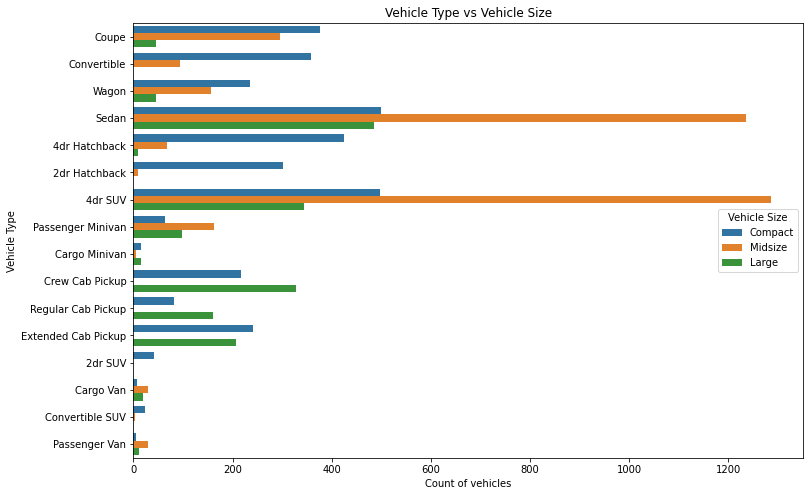

In [278]:
# Vehicle style and Vehicle Size analysis using countplot
plt.figure(figsize=(12,8))
sns.countplot(y='Vehicle Style',data=dataset,hue='Vehicle Size')
plt.title('Vehicle Type vs Vehicle Size')
plt.ylabel("Vehicle Type")
plt.xlabel('Count of vehicles')

From the above chart 4dr SUV cars and Sedan cars are majoritily of middle size. 

Text(0.5, 0, 'Count of vehicles')

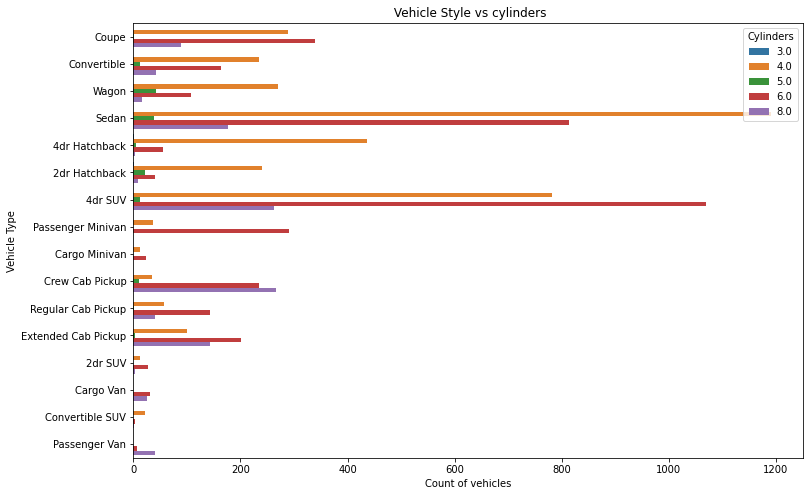

In [279]:
# Vehicle style and Cylinder analysis using countplot
plt.figure(figsize=(12,8))
sns.countplot(y='Vehicle Style',data=dataset,hue='Cylinders')
plt.title(' Vehicle Style vs cylinders')
plt.ylabel("Vehicle Type")
plt.xlabel('Count of vehicles')

From the above chart majority of 4 Cylinders used by Sedan car ,majority of 6 Cylinders used by 4dr SUV so on.

Text(0.5, 0, 'Count of vehicles')

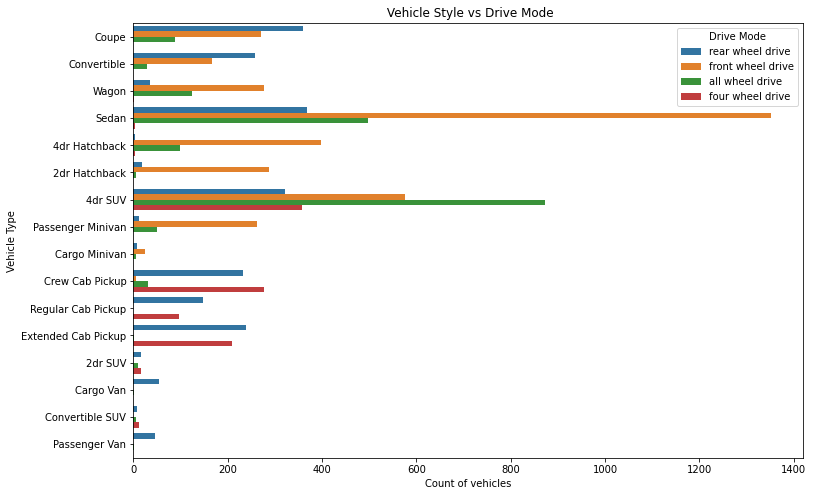

In [280]:
# Vehicle style and Drive type analysis using countplot
plt.figure(figsize=(12,8))
sns.countplot(y='Vehicle Style',data=dataset,hue='Drive Mode')
plt.title(' Vehicle Style vs Drive Mode')
plt.ylabel("Vehicle Type")
plt.xlabel('Count of vehicles')

From this above chart sedan cars uses front wheel drive mode majoritily,4drSUV cars uses all wheel drive mode so on.



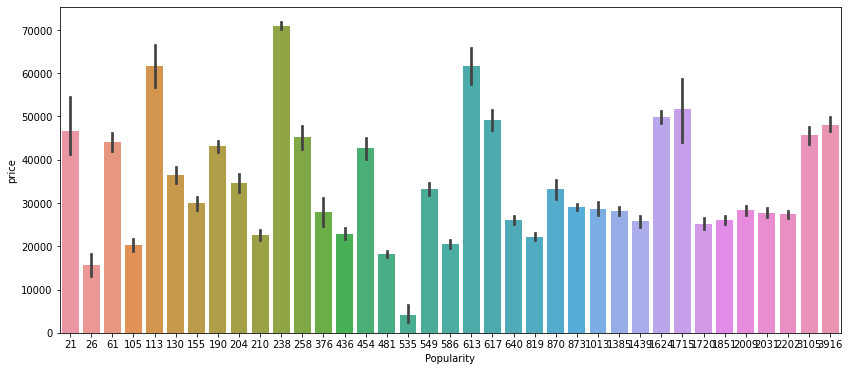

In [281]:
# Plotting Popularity vs price using barplot
plt.figure(figsize=(14,6))
sns.barplot(dataset['Popularity'],dataset['price'])

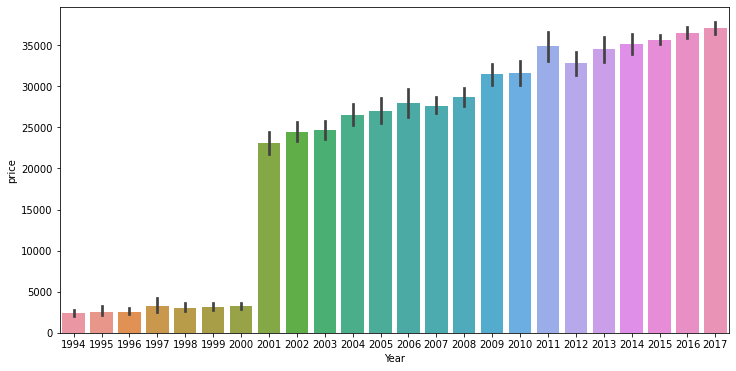

In [282]:
# Plotting Year vs price using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['Year'],dataset['price'])

From this above chart we see that after year 2000 price increases linearly as the year goeson

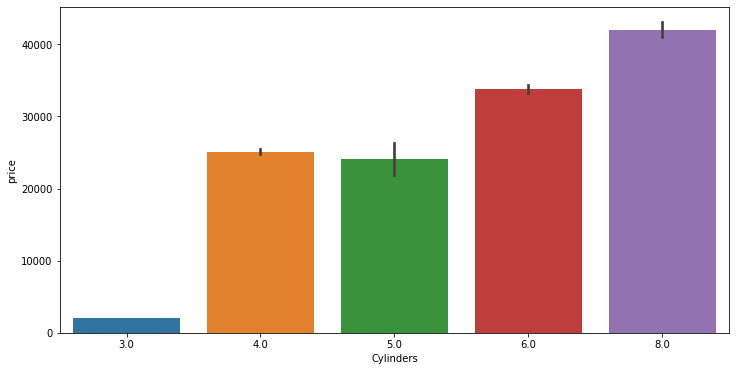

In [283]:
# Plotting Cylinders vs price using barplot
plt.figure(figsize=(12,6))
sns.barplot(dataset['Cylinders'],dataset['price'])

From this above chart we see that as the increasing in the cylinders price is also increases

# Making a New group 'Price_group'

In [284]:
# Create a new column price_group and assign the value based on car price
dataset['price_group'] = pd.cut(dataset['price'],[0,20000,40000,60000,80000,100000,600000],labels=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'],include_lowest = True)
dataset['price_group'] =dataset['price_group'].astype(object)

Text(0.5, 0, 'Price Group')

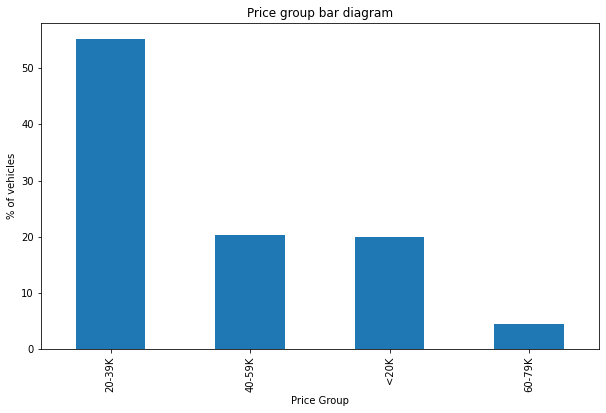

In [285]:
(dataset['price_group'].value_counts() / len(dataset) * 100).plot.bar(figsize=(10,6))
plt.title("Price group bar diagram")
plt.ylabel("% of vehicles")
plt.xlabel("Price Group")


# 9.Base ML Model

**One Hot Encoding**

A One hot encoding is a representation of categorical variables as a binary values.This requires that the categorical values be mapped to integer values.

In [286]:
# importing the LabelEncoder library
from sklearn.preprocessing import LabelEncoder

In [287]:
# Creating the LabelEncoder object
label_Encoder=LabelEncoder()
p = ['Make','Model','Transmission','Drive Mode','Vehicle Size','Vehicle Style']
# converting categorical variables into binary values
for i in p:
    dataset[i]=label_Encoder.fit_transform(dataset[i])    

In [288]:
# Displaying the top 5 rows
dataset.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,price,price_group
0,3,3,2011,335.0,6.0,2,3,0,8,26,19,3916,46135,40-59K
1,3,2,2011,300.0,6.0,2,3,0,6,28,19,3916,40650,40-59K
2,3,2,2011,300.0,6.0,2,3,0,8,28,20,3916,36350,20-39K
3,3,2,2011,230.0,6.0,2,3,0,8,28,18,3916,29450,20-39K
4,3,2,2011,230.0,6.0,2,3,0,6,28,18,3916,34500,20-39K


**Train and test the dataset**

In [289]:
# importing train_test_split libraries
from sklearn.model_selection import train_test_split 

In [290]:
x = dataset[['Make','Model','Year','HP','Cylinders','Transmission','Drive Mode','Vehicle Size','Vehicle Style','MPG-H','MPG-C','Popularity']]
y = dataset['price'].values

In [291]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1,1))

In [292]:
# split the dataset into 80% train and 20% test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# 10.Spot Checking Algorithms

**1.Using Multiple Linear Regression**

Multiple Linear Regression attempts to model the relationship between two or more features and a response by fitting a linear equation to observed data. The steps to perform multiple linear Regression are almost similar to that of simple linear Regression. The Difference Lies in the evaluation. We can use it to find out which factor has the highest impact on the predicted output and now different variable relate to each other.

In [293]:
# Fitting the multiple linear regression to Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

0.7055879603220869


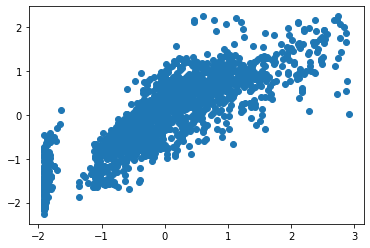

In [294]:
# Predicting the test set result
y_pred = regressor.predict(x_test)
plt.scatter(y_test,y_pred)
print(regressor.score(x_test,y_test))

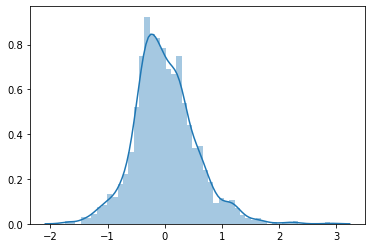

In [295]:
# Plotting distplot of testing vs prediction
sns.distplot((y_test-y_pred),bins=50)

In [296]:
# Calculating the errors
import math
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("The mean absolute error is =",mean_absolute_error(y_test,y_pred))
print("Root mean square error is =",math.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score =",r2_score(y_test,y_pred))

The mean absolute error is = 0.4105093547721756
Root mean square error is = 0.5351152451266818
R2 score = 0.7055879603220869


**2. Using SVM**


SVM is a discriminative algorithm that tries to find the optimal hyperplane.In 2D space hyperplane is a line that optimally divides the data points into two different classes.In a higher dimensional space,a hyperplane would hava a different shape rather than a line

In [297]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

0.6094097461566808


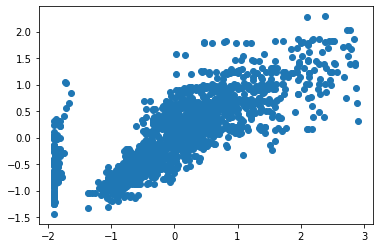

In [299]:
# Predicting a new result
y_pred = reg.predict(x_test)
print(reg.score(x_test,y_test))
plt.scatter(y_test,y_pred)

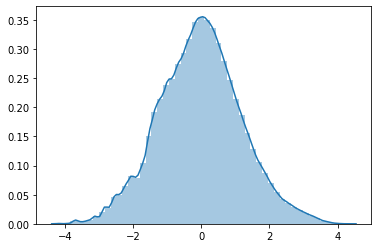

In [300]:
# Plotting distplot of testing vs prediction
sns.distplot((y_test-y_pred),bins=50)

In [301]:
# Plotting distplot of testing vs prediction
import math
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("The mean absolute error is =",mean_absolute_error(y_test,y_pred))
print("Root mean square error is =",math.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score =",r2_score(y_test,y_pred))

The mean absolute error is = 0.4245667259956908
Root mean square error is = 0.6163540331039411
R2 score = 0.6094097461566808


**3.Using Decission tree regressor**

Decision tree builds regression models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [302]:
#Fitting DescissionTree to the dataset
from sklearn.tree import DecisionTreeRegressor
desc = DecisionTreeRegressor(max_depth=100)
desc.fit(x_train,y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=100,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

0.9344865786923536


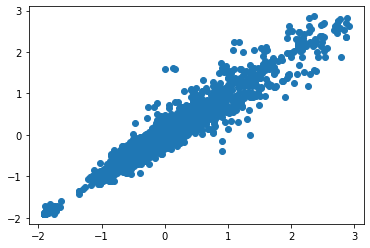

In [303]:
# Predicting a new result
y_pred = desc.predict(x_test)
print(desc.score(x_test,y_test))
plt.scatter(y_test,y_pred)

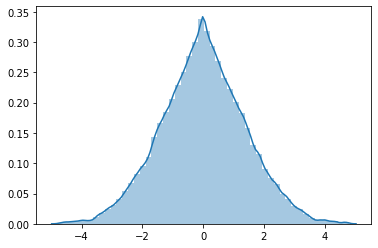

In [304]:
# Plotting distplot of testing vs prediction
sns.distplot((y_test-y_pred),bins=50)

In [305]:
import math
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("The mean absolute error is =",mean_absolute_error(y_test,y_pred))
print("Root mean square error is =",math.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score =",r2_score(y_test,y_pred))

The mean absolute error is = 0.1742024610370398
Root mean square error is = 0.2524263461819361
R2 score = 0.9344865786923536


**4.Using Random Forest**

A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [306]:
# Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# creating the object of RandomForestRegressor
model = RandomForestRegressor(n_estimators=500)
# Fit the model using RandomForestRegressor
model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

0.9503960058279685


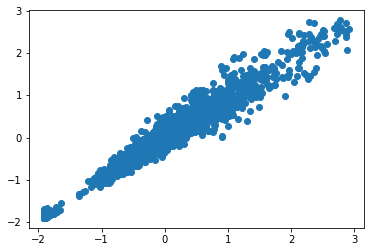

In [307]:
# Predict the price using RandomForestRegressor algorithm
y_pred = model.predict(x_test)
# To find accuracy 
print(model.score(x_test,y_test))
plt.scatter(y_test,y_pred)

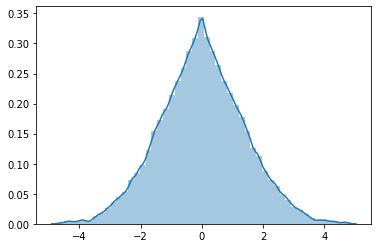

In [308]:
# Plotting distplot of testing vs prediction
sns.distplot((y_test-y_pred),bins=50)

In [309]:
import math
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("The mean square error is =",mean_squared_error(y_test,y_pred))
print("Root mean square error is =",math.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score =",r2_score(y_test,y_pred))

The mean square error is = 0.048245379802181694
Root mean square error is = 0.21964830935425317
R2 score = 0.9503960058279685


**5.Using XGBOOST**

XGBOOST is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. Please see the chart below for the evolution of tree-based algorithms over the years.

In [310]:
# Fitting XGBOOST to the dataset
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100,learning_rate = 0.08,gamma=0,subsample=0.75,colsample_bytree=1,max_depth=7)


[10:13:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Variance score =  0.9556790268148369
accuracy = 0.9585961990052148


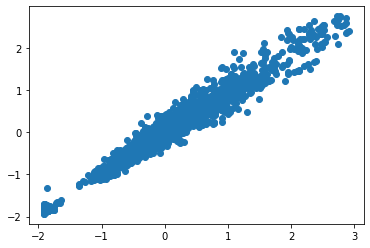

In [311]:
#Fitting the training data and predicting the data
from sklearn.metrics import explained_variance_score
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print("Variance score = ",explained_variance_score(y_pred,y_test))
print("accuracy =",xgb.score(x_test,y_test))
plt.scatter(y_test,y_pred)

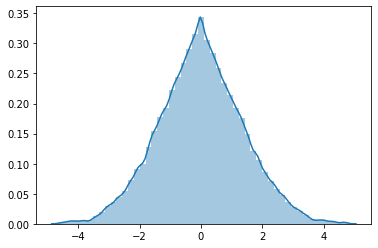

In [312]:
sns.distplot((y_test-y_pred),bins=50)

In [313]:
import math
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("The mean absolute error is =",mean_absolute_error(y_test,y_pred))
print("Root mean square error is =",math.sqrt(mean_squared_error(y_test,y_pred)))
print("Coefficient of determination or R squared =",r2_score(y_test,y_pred))

The mean absolute error is = 0.14875697255471237
Root mean square error is = 0.2006733252422981
Coefficient of determination or R squared = 0.9585961990052146


After the consideration of 5 regressor algrithm we say that XGBOOST and Random Forest algorithm gives higher accurate result that is 95%,after that decission tree is given around 93% and multiple linear regression gives 70% as well svm is giving 60% results on the car dataset.